# Histogram of Predicted Uncertainties

This plots data written by the `process_uncertainties.py` script.

In [34]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD

sns.set()

In [35]:
tag = "skew_gaussian/k275/delta_window2"

In [36]:
dfs = {}

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    dfs[i] = pd.read_csv(f"../data/processed/{tag}/processed_daysahead{i}_R000.csv")

dfs[1].head()

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_loc,forward_scale,forward_shape,forward_crps
0,2010-01-02 12:00:00,2010-01-03 06:00:00,376.450000,289.79,266.535042,106.253418,6.970238,NaN
1,2010-01-02 18:00:00,2010-01-03 12:00:00,369.400000,290.97,261.458965,108.082417,5.759502,NaN
2,2010-01-03 00:00:00,2010-01-03 18:00:00,359.800000,305.76,253.275783,108.224999,5.068823,NaN
3,2010-01-03 06:00:00,2010-01-04 00:00:00,370.450000,298.70,252.429388,112.337343,5.811849,NaN
4,2010-01-03 12:00:00,2010-01-04 06:00:00,363.533333,285.85,258.251383,120.541284,5.824481,NaN


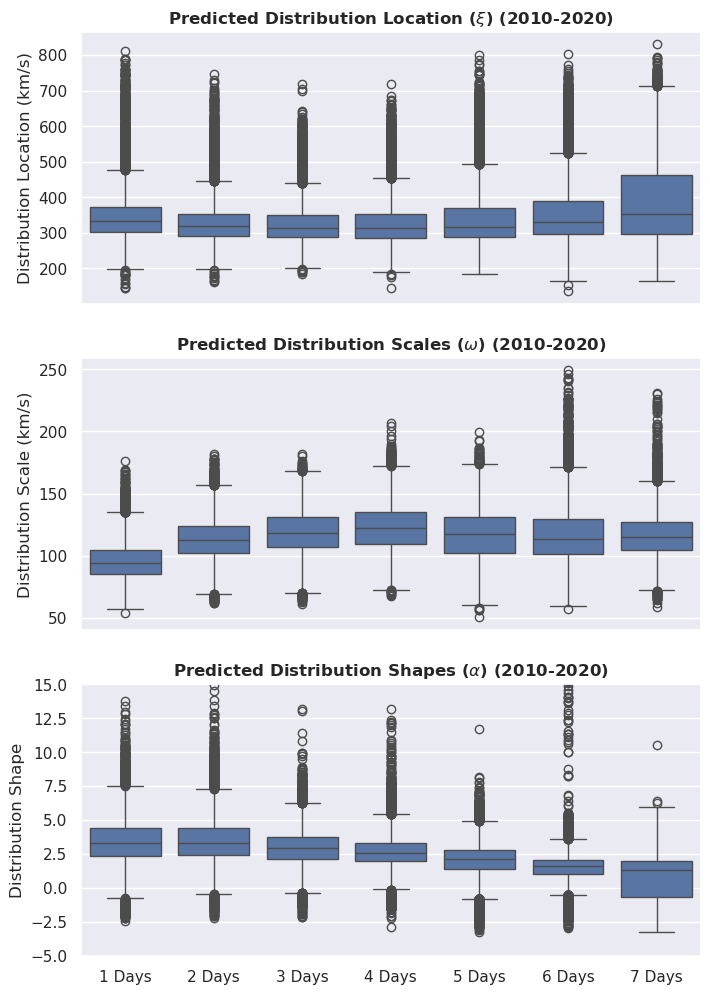

In [38]:
bins = np.arange(35, 190, 1)

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

ax = axes[0]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_loc:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Location (km/s)")
# ax.set_xlabel("# Days Ahead")
ax.set_title(r"Predicted Distribution Location ($\xi$) (2010-2020)", fontweight="bold")

ax = axes[1]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_scale:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Scale (km/s)")
# ax.set_xlabel("# Days Ahead")
ax.set_title(r"Predicted Distribution Scales ($\omega$) (2010-2020)", fontweight="bold")

ax = axes[2]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_shape:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Distribution Shape")
ax.set_label("# Days Ahead")
ax.set_title(r"Predicted Distribution Shapes ($\alpha$) (2010-2020)", fontweight="bold")
ax.set_ylim([-5, 15])
ax.set_xlabel("")
fig.savefig("../plots/distribution_of_variables.png", dpi=300)